In [1]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 0. 시즌열, 달 열 만들고 더미화
# +시각화(자료 명시적으로 보기위해)
# 1. 결측치 뺀 상태에
# 2. 7:3으러 나눠서
# 3. 모델 학습
# 4. 결측치 채우기

# 0. 전처리

In [3]:
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt

In [4]:
dangjin_mise = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/data/dangjin_mise.csv')
dangjin_rain = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/data/dangjin_rain.csv')
dangjin_ilsa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/data/dangjin_ilsa.csv')
dangjin_obs=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/당진/dangjin_obs_data.csv')
#dangjin_chomise_jan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/data/dangjin_chomise_Jan.csv')
#dangjin_mise_jan = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/data/dangjin_pm10.csv')

dangjin_rain.info()
print("="*50)
print(len(dangjin_rain))
print(len(dangjin_ilsa))
print(len(dangjin_obs))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       1068 non-null   object 
 1   지점       1068 non-null   int64  
 2   강수량(mm)  427 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.2+ KB
1068
13980
25626


In [5]:
mise = dangjin_mise.loc[:, ['날짜','아황산가스','일산화탄소','오존','이산화질소','PM10','PM2.5']]

mise=mise.rename(columns={'날짜':'Time'})
mise
mise['Time']=pd.to_datetime(mise['Time'])

In [6]:
dangjin_mise

,Unnamed: 0,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5,시도,측정소명,측정소코드
0,0,2018-03-01-00:00:00,0.002,0.4,0.029,0.010,10.0,7.0,NaN,NaN,NaN
1,0,2018-03-01 01:00:00,0.002,0.4,0.029,0.011,9.0,4.0,충남 당진시\n,당진시청사,534434.0
2,1,2018-03-01 02:00:00,0.003,0.4,0.027,0.013,1.0,NaN,충남 당진시\n,당진시청사,534434.0
3,2,2018-03-01 03:00:00,0.002,0.4,0.025,0.011,1.0,NaN,충남 당진시\n,당진시청사,534434.0
4,3,2018-03-01 04:00:00,0.002,0.5,0.028,0.009,1.0,NaN,충남 당진시\n,당진시청사,534434.0
...,...,...,...,...,...,...,...,...,...,...,...
24884,24883,2020-12-31 20:00:00,0.004,0.6,0.009,0.029,39.0,16.0,충남 당진시\n,당진시청사,534434.0
24885,24884,2020-12-31 21:00:00,0.004,0.6,0.011,0.026,43.0,24.0,충남 당진시\n,당진시청사,534434.0
24886,24885,2020-12-31 22:00:00,0.004,0.6,0.012,0.023,36.0,20.0,충남 당진시\n,당진시청사,534434.0
24887,24886,2020-12-31 23:00:00,0.004,0.6,0.013,0.022,38.0,19.0,충남 당진시\n,당진시청사,534434.0


In [7]:
 #결측치 확인
print(dangjin_ilsa[dangjin_ilsa.isnull().any(axis=1)]) #일사량에서 결측있는 행 2개
print("="*100)
print(dangjin_obs.isna().sum())
print("="*100)
print(dangjin_rain.isna().sum())

       지점 지점명                일시  일조(hr)  일사(MJ/m2)
2314  129  서산  2018-08-08 14:00     NaN       2.54
4445  129  서산  2019-01-31 14:00     0.1        NaN
지점              0
지점명             0
일시              0
기온(°C)         37
풍속(m/s)        36
풍향(16방위)       36
습도(%)          35
전운량(10분위)    3970
dtype: int64
날짜           0
지점           0
강수량(mm)    641
dtype: int64


In [8]:
#rain
dangjin_rain.rename(columns = {'강수량(mm)' : 'Rain', '날짜':'일시'},
               inplace = True)
dangjin_rain['Rain'].isna()
dangjin_rain.Rain[dangjin_rain['Rain'].isna()] = 0
print(dangjin_rain.isna().sum())

dangjin_rain['일시']=pd.to_datetime(dangjin_rain['일시'])
dangjin_rain=dangjin_rain.set_index('일시').resample('H').mean().interpolate(method="polynomial", order=2)
dangjin_rain

일시      0
지점      0
Rain    0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,지점,Rain
일시,,
2018-03-01 00:00:00,129.0,1.800000
2018-03-01 01:00:00,129.0,1.792298
2018-03-01 02:00:00,129.0,1.778744
2018-03-01 03:00:00,129.0,1.759338
2018-03-01 04:00:00,129.0,1.734080
...,...,...
2021-01-30 20:00:00,129.0,0.064975
2021-01-30 21:00:00,129.0,0.051168
2021-01-30 22:00:00,129.0,0.035736


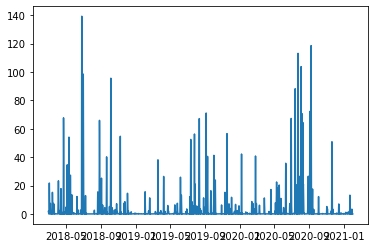

In [9]:
#plt.plot(dangjin_rain[dangjin_rain.Rain<0]) #2차 보간시 음수생김
#dangjin_rain[dangjin_rain['Rain']]
                  
dangjin_rain.Rain[dangjin_rain.Rain<0] =0
len(dangjin_rain.Rain[dangjin_rain.Rain<0])

plt.plot(dangjin_rain.Rain)


In [10]:
#pd.qcut(dangjin_rain.Rain[dangjin_rain['Rain']>0],q=4)


In [11]:
#qcut 포기
#[-0.001, 0.099, 0.6, 3.35,12.175,140]

# bins = [-0.001, 0.001 , 0.0284, 0.431, 4.24, 140] #max 139.3
# labels = [0,1,2,3,4]
# dangjin_rain['Rain'] = pd.cut(dangjin_rain['Rain'], bins, labels=labels)
# dangjin_rain['Rain'].value_counts().to_frame()


In [12]:
#sampling때문에 변수이름 바껴서
rain_new = dangjin_rain 
rain_new

,지점,Rain
일시,,
2018-03-01 00:00:00,129.0,1.800000
2018-03-01 01:00:00,129.0,1.792298
2018-03-01 02:00:00,129.0,1.778744
2018-03-01 03:00:00,129.0,1.759338
2018-03-01 04:00:00,129.0,1.734080
...,...,...
2021-01-30 20:00:00,129.0,0.064975
2021-01-30 21:00:00,129.0,0.051168
2021-01-30 22:00:00,129.0,0.035736


In [13]:
#강수량 데이터를 시간단위로 나눠준 후 
#결측값인 강수량을 그날은 동일하게 채워주기

# dangjin_rain['일시']=pd.to_datetime(dangjin_rain['일시'])

# rain_new = pd.DataFrame()
# rain_new['일시'] = pd.date_range(start='2018-03-01 00:00:00', end='2021-01-31 23:00:00', freq='H')
# dangjin_rain['Rain'].interpolate(method="linear") 
#polynomial", order=2 안되는디

#rain_new = pd.merge(rain_new, dangjin_rain, on='일시', how='outer')
#rain_new

# #선형보간으로
# for i,row in rain_new.iterrows():
#   if row['일시'].hour == 0:
#     temp = (row['Rain'])
#     rain_new.Rain.iloc[i+1:i+24] = temp 

# rain_new.Rain.value_counts().to_frame()

In [14]:
#merge에 대비해서 지점값 다 동일하게 맞춰주기
rain_new['지점'] = 129
rain_new

,지점,Rain
일시,,
2018-03-01 00:00:00,129,1.800000
2018-03-01 01:00:00,129,1.792298
2018-03-01 02:00:00,129,1.778744
2018-03-01 03:00:00,129,1.759338
2018-03-01 04:00:00,129,1.734080
...,...,...
2021-01-30 20:00:00,129,0.064975
2021-01-30 21:00:00,129,0.051168
2021-01-30 22:00:00,129,0.035736


In [15]:
# 일시 맞춰서 데이터 합치기 dangjin_obs+dangjin_ilsa+강수량

dangjin = pd.merge(dangjin_obs,dangjin_ilsa, how='outer',on=['지점','지점명','일시'])
#dangjin = pd.concat([dangjin,rain_new], axis=1)

In [16]:
dangjin['일시']=pd.to_datetime(dangjin['일시'])
dangjin=pd.merge(dangjin,rain_new, how='outer',on=['일시','지점']).sort_values('일시')
dangjin

dangjin.rename(columns = {'일시' :'Time'}, inplace=True)


In [17]:
#미세먼지 합치기 : 뒤에 1월 날라감 
mise
#mise['Time']=pd.to_datetime(mise['Time'])
dangjin=pd.merge(dangjin, mise ,how='outer')#.sort_values('일시')
print(dangjin.Rain.isna().sum())



23


## 결측치 채우기

In [18]:
dangjin.rename(columns = {'일시' : 'Date', '기온(°C)':'Temperature','풍속(m/s)':'WindSpeed',
                        '풍향(16방위)':'WindDirection','전운량(10분위)':'Cloud','습도(%)':'Humidity',
                        '일조(hr)':'sunTime','일사(MJ/m2)':'solar','아황산가스':'so2', '일산화탄소':'co',  '오존': 'ozone', '이산화질소':'no2'},
               inplace = True)
dangjin

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,NaN,NaN,1.800000,0.002,0.4,0.029,0.010,10.0,7.0
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,NaN,NaN,1.792298,0.002,0.4,0.029,0.011,9.0,4.0
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,NaN,NaN,1.778744,0.003,0.4,0.027,0.013,1.0,NaN
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,NaN,NaN,1.759338,0.002,0.4,0.025,0.011,1.0,NaN
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,NaN,NaN,1.734080,0.002,0.5,0.028,0.009,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25629,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25630,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#일조, 일사 0으로 채워주기
dangjin['solar']=dangjin['solar'].fillna(0)
dangjin['sunTime']=dangjin['sunTime'].fillna(0)
dangjin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             25632 non-null  int64         
 1   지점명            25626 non-null  object        
 2   Time           25632 non-null  datetime64[ns]
 3   Temperature    25589 non-null  float64       
 4   WindSpeed      25590 non-null  float64       
 5   WindDirection  25590 non-null  float64       
 6   Humidity       25591 non-null  float64       
 7   Cloud          21656 non-null  float64       
 8   sunTime        25632 non-null  float64       
 9   solar          25632 non-null  float64       
 10  Rain           25609 non-null  float64       
 11  so2            24439 non-null  float64       
 12  co             24453 non-null  float64       
 13  ozone          24342 non-null  float64       
 14  no2            24453 non-null  float64       
 15  PM10           2402

In [20]:
#2차보간

dangjin['Temperature'].interpolate(method='polynomial', order=2,inplace=True) 
dangjin['WindSpeed'].interpolate(method='polynomial', order=2,inplace=True) 
dangjin['WindDirection'].interpolate(method='polynomial', order=2,inplace=True) 
dangjin['Humidity'].interpolate(method='polynomial', order=2,inplace=True) 

#dangjin['PM10'].interpolate(method='polynomial',order=2,inplace=True) 
#dangjin['PM2.5'].interpolate(method='polynomial',order=2,inplace=True) 

# dangjin['so2'].interpolate(method='polynomial', order=2,inplace=True) 
# dangjin['ozone'].interpolate(method='polynomial', order=2,inplace=True) 
# dangjin['no2'].interpolate(method='polynomial', order=2,inplace=True) 



In [21]:
dangjin.iloc[0,11:] = [0.002	, 0.4,	0.029,	0.01,	10,	7]
dangjin

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,0.0,0.0,1.800000,0.002,0.4,0.029,0.010,10.0,7.0
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,0.0,0.0,1.792298,0.002,0.4,0.029,0.011,9.0,4.0
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,0.0,0.0,1.778744,0.003,0.4,0.027,0.013,1.0,NaN
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,0.0,0.0,1.759338,0.002,0.4,0.025,0.011,1.0,NaN
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,0.0,0.0,1.734080,0.002,0.5,0.028,0.009,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25628,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25629,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25630,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#dangjin[(dangjin['year'] == '2020') & (dangjin['month'] == '12') ].sort_values(by='Time')
#dangjin[(dangjin['year'] == '2021') & (dangjin['month'] == '01') ].head(20)


In [23]:
#pip install impyute

지점                  0
지점명                 6
Time                0
Temperature         0
WindSpeed           0
WindDirection       0
Humidity            0
Cloud            3976
sunTime             0
solar               0
Rain               23
so2              1193
co               1179
ozone            1290
no2              1179
PM10             1603
PM2.5            2276
dtype: int64


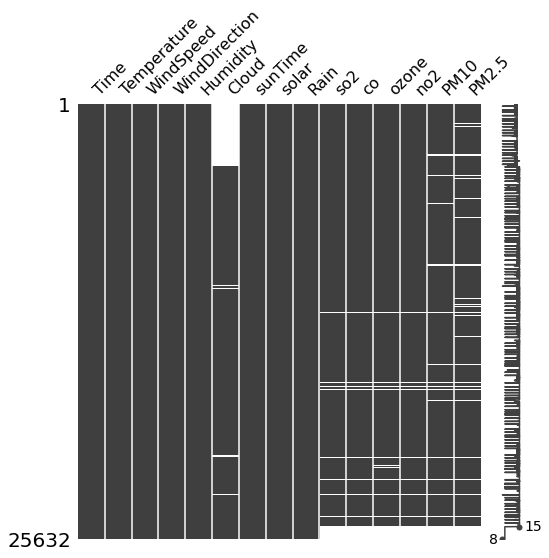

In [24]:
print(dangjin.isnull().sum())
import missingno as msno
msno.matrix(dangjin.iloc[:,2:],figsize=(8,8))
plt.show()

In [25]:
dangjin.iloc[25608:25610]

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5
25608,129,서산,2021-01-31 00:00:00,-2.7,1.1,70.0,88.0,4.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
25609,129,서산,2021-01-31 01:00:00,-2.4,1.1,70.0,86.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# 연 월 일 시간 나눠보기

dangjin['year']=dangjin.Time.dt.strftime('%Y') 
dangjin['month']=dangjin.Time.dt.strftime('%m') 
dangjin['day']=dangjin.Time.dt.strftime('%d') 
dangjin['hour']=dangjin.Time.dt.strftime('%H') 
#dangjin['season']=((dangjin['Date'].dt.month % 12 )+3)//3
dangjin

# 1: 겨울 | 2: 봄 | 3: 여름 | 4: 가을

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5,year,month,day,hour
0,129,서산,2018-03-01 00:00:00,3.1,3.6,340.0,96.0,NaN,0.0,0.0,1.800000,0.002,0.4,0.029,0.010,10.0,7.0,2018,03,01,00
1,129,서산,2018-03-01 01:00:00,2.8,0.7,140.0,97.0,NaN,0.0,0.0,1.792298,0.002,0.4,0.029,0.011,9.0,4.0,2018,03,01,01
2,129,서산,2018-03-01 02:00:00,2.6,3.2,320.0,95.0,NaN,0.0,0.0,1.778744,0.003,0.4,0.027,0.013,1.0,NaN,2018,03,01,02
3,129,서산,2018-03-01 03:00:00,2.0,1.9,230.0,97.0,NaN,0.0,0.0,1.759338,0.002,0.4,0.025,0.011,1.0,NaN,2018,03,01,03
4,129,서산,2018-03-01 04:00:00,2.2,2.1,180.0,97.0,NaN,0.0,0.0,1.734080,0.002,0.5,0.028,0.009,1.0,NaN,2018,03,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25627,129,서산,2021-01-31 19:00:00,6.7,1.5,200.0,75.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,19
25628,129,서산,2021-01-31 20:00:00,6.2,0.8,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,20
25629,129,서산,2021-01-31 21:00:00,5.3,0.7,230.0,82.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,21
25630,129,서산,2021-01-31 22:00:00,5.8,1.0,200.0,77.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,01,31,22


In [27]:
# 1월 미세먼지 붙이기
def mise_pm(file_name, pm):
  df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/data/'+f'{file_name}', sep='\t', header=None)
  df_values=df.values
  #type(df_values)
  datalist=[]
  datalist.append(df_values) #리스트로 변경
  df_array=np.array(datalist)
  df2=df_array.reshape(1,744)

  df3=pd.DataFrame(df2.T)
  df3['Time']=pd.date_range(start='2021-01-01 01:00:00', end='2021-02-01 00:00:00', freq='H')
  df3=df3.rename(columns={0:f'{pm}'})
  return df3

dangjin_mise_pm25=mise_pm('dangjin_pm25.txt','PM2.5')
dangjin_mise_pm10=mise_pm('dangjin_pm10.txt','PM10')


#PM2.5, PM10 합치고 2월1일 0시 삭제, time을 인덱스로 
def mise_only(x,y):
  mise_add=pd.merge(x,y,on='Time')
  mise_add=mise_add.iloc[:-1,:]
  mise_add=mise_add.set_index(mise_add['Time'])
  return mise_add
dangjin_mise_jan=mise_only(dangjin_mise_pm25, dangjin_mise_pm10)

#1월 데이터 합치기
#data는 시계열 형식의 time열을 가지고 있어야함.
def add_jan(data,add):
  data=data.set_index(data['Time'])
  data.fillna(add, inplace=True)
  return data

dangjin=add_jan(dangjin,dangjin_mise_jan)


#dangjin.iloc[:,3:].astype(float)
#pd.to_numeric(dangjin.iloc[:,3:],errors = 'coerce')

#dangjin = dangjin.convert_objects(convert_numeric=True)
dangjin

,지점,지점명,Time,Temperature,WindSpeed,WindDirection,Humidity,Cloud,sunTime,solar,Rain,so2,co,ozone,no2,PM10,PM2.5,year,month,day,hour
Time,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,129,서산,2018-03-01 00:00:00,3.1,3.6,340,96,NaN,0,0,1.8,0.002,0.4,0.029,0.01,10,7,2018,03,01,00
2018-03-01 01:00:00,129,서산,2018-03-01 01:00:00,2.8,0.7,140,97,NaN,0,0,1.7923,0.002,0.4,0.029,0.011,9,4,2018,03,01,01
2018-03-01 02:00:00,129,서산,2018-03-01 02:00:00,2.6,3.2,320,95,NaN,0,0,1.77874,0.003,0.4,0.027,0.013,1,NaN,2018,03,01,02
2018-03-01 03:00:00,129,서산,2018-03-01 03:00:00,2,1.9,230,97,NaN,0,0,1.75934,0.002,0.4,0.025,0.011,1,NaN,2018,03,01,03
2018-03-01 04:00:00,129,서산,2018-03-01 04:00:00,2.2,2.1,180,97,NaN,0,0,1.73408,0.002,0.5,0.028,0.009,1,NaN,2018,03,01,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-31 19:00:00,129,서산,2021-01-31 19:00:00,6.7,1.5,200,75,8,0,0,NaN,NaN,NaN,NaN,NaN,68,17,2021,01,31,19
2021-01-31 20:00:00,129,서산,2021-01-31 20:00:00,6.2,0.8,200,77,8,0,0,NaN,NaN,NaN,NaN,NaN,62,21,2021,01,31,20
2021-01-31 21:00:00,129,서산,2021-01-31 21:00:00,5.3,0.7,230,82,8,0,0,NaN,NaN,NaN,NaN,NaN,59,30,2021,01,31,21


In [28]:
dangjin['PM2.5'] = dangjin['PM2.5'].apply(lambda x: np.nan if isinstance(x, str) else x)
dangjin['PM10'] = dangjin['PM10'].apply(lambda x: np.nan if isinstance(x, str) else x)

dangjin.iloc[:,4:] = dangjin.iloc[:,4:].apply(lambda x: np.nan if isinstance(x, str) else x)
temp = dangjin.iloc[:,3:].astype(float, errors = 'raise')


In [29]:
dangjin = pd.concat([dangjin['Time'],temp], axis=1)

In [30]:
dangjin.reset_index(drop=True, inplace=True)

## knn

In [31]:
pip install impyute

In [32]:
from sklearn.preprocessing import StandardScaler
from impyute.imputation.cs import fast_knn
from sklearn.impute import KNNImputer

In [33]:
#WindDirection	Humidity	Cloud	sunTime	solar	Rain	so2	co	ozone	no2	PM10	PM2.5
#imputer = KNNImputer(n_neighbors=5)
#filled = imputer.fit_transform(obs_scaled)
np_imputed = fast_knn(dangjin[['Temperature','WindSpeed',	'WindDirection','Humidity', 'so2',	'ozone',	'no2',	'PM2.5',	'PM10', 'Cloud']].values, k=30, normalize="std")  # knn 학습

In [34]:
df_imputed = pd.DataFrame(np_imputed)
df_imputed
#pd.merge([dangjin.iloc[:,1:6], df_imputed.iloc[:,4:9]])
temp = pd.concat([dangjin['Time'], df_imputed], axis=1)
#df_cloud=pd.concat([temp,air],axis=1)
df_imputed

,0,1,2,3,4,5,6,7,8,9
0,3.1,3.6,340.0,96.0,0.002000,0.029000,0.010000,7.000000,10.000000,5.411584
1,2.8,0.7,140.0,97.0,0.002000,0.029000,0.011000,4.000000,9.000000,5.944015
2,2.6,3.2,320.0,95.0,0.003000,0.027000,0.013000,15.813530,1.000000,7.241237
3,2.0,1.9,230.0,97.0,0.002000,0.025000,0.011000,17.699579,1.000000,6.812875
4,2.2,2.1,180.0,97.0,0.002000,0.028000,0.009000,18.325597,1.000000,7.682330
...,...,...,...,...,...,...,...,...,...,...
25627,6.7,1.5,200.0,75.0,0.003930,0.036822,0.012365,25.101604,41.064586,8.000000
25628,6.2,0.8,200.0,77.0,0.003821,0.046016,0.013299,21.000000,62.000000,8.000000
25629,5.3,0.7,230.0,82.0,0.003712,0.040611,0.013344,30.000000,59.000000,8.000000
25630,5.8,1.0,200.0,77.0,0.004211,0.037096,0.011680,21.000000,43.000000,8.000000


In [35]:
air = df_imputed.iloc[:,4:] #'so2',	'ozone',	'no2',	'PM2.5',	'PM10', 'Cloud'
air=air.rename(columns={4:'so2',5:'ozone',6:'no2',7:	'PM2.5',8:	'PM10',9: 'Cloud'})
air

,so2,ozone,no2,PM2.5,PM10,Cloud
0,0.002000,0.029000,0.010000,7.000000,10.000000,5.411584
1,0.002000,0.029000,0.011000,4.000000,9.000000,5.944015
2,0.003000,0.027000,0.013000,15.813530,1.000000,7.241237
3,0.002000,0.025000,0.011000,17.699579,1.000000,6.812875
4,0.002000,0.028000,0.009000,18.325597,1.000000,7.682330
...,...,...,...,...,...,...
25627,0.003930,0.036822,0.012365,25.101604,41.064586,8.000000
25628,0.003821,0.046016,0.013299,21.000000,62.000000,8.000000
25629,0.003712,0.040611,0.013344,30.000000,59.000000,8.000000
25630,0.004211,0.037096,0.011680,21.000000,43.000000,8.000000


In [36]:
#obs_imputed.columns = dangjin.columns[2:17]
#obs_imputed = obs_imputed.drop(['Temperature', 'WindSpeed', 'WindDirection', 'Humidity', 'Cloud', 'sunTime','solar','Rain'], axis=1)
obs_imputed=air #미세먼지 대기질만 남기기 
obs_imputed=pd.concat([obs_imputed,dangjin['Time']],axis=1 )
#mise_imputed = mise_imputed.drop(['temp', 'windsp', 'winddir', 'humid', 'cloud', 'sun_hr','solar'], axis=1)
obs_imputed

,so2,ozone,no2,PM2.5,PM10,Cloud,Time
0,0.002000,0.029000,0.010000,7.000000,10.000000,5.411584,2018-03-01 00:00:00
1,0.002000,0.029000,0.011000,4.000000,9.000000,5.944015,2018-03-01 01:00:00
2,0.003000,0.027000,0.013000,15.813530,1.000000,7.241237,2018-03-01 02:00:00
3,0.002000,0.025000,0.011000,17.699579,1.000000,6.812875,2018-03-01 03:00:00
4,0.002000,0.028000,0.009000,18.325597,1.000000,7.682330,2018-03-01 04:00:00
...,...,...,...,...,...,...,...
25627,0.003930,0.036822,0.012365,25.101604,41.064586,8.000000,2021-01-31 19:00:00
25628,0.003821,0.046016,0.013299,21.000000,62.000000,8.000000,2021-01-31 20:00:00
25629,0.003712,0.040611,0.013344,30.000000,59.000000,8.000000,2021-01-31 21:00:00
25630,0.004211,0.037096,0.011680,21.000000,43.000000,8.000000,2021-01-31 22:00:00


Text(0.5, 1.0, 'PM10')

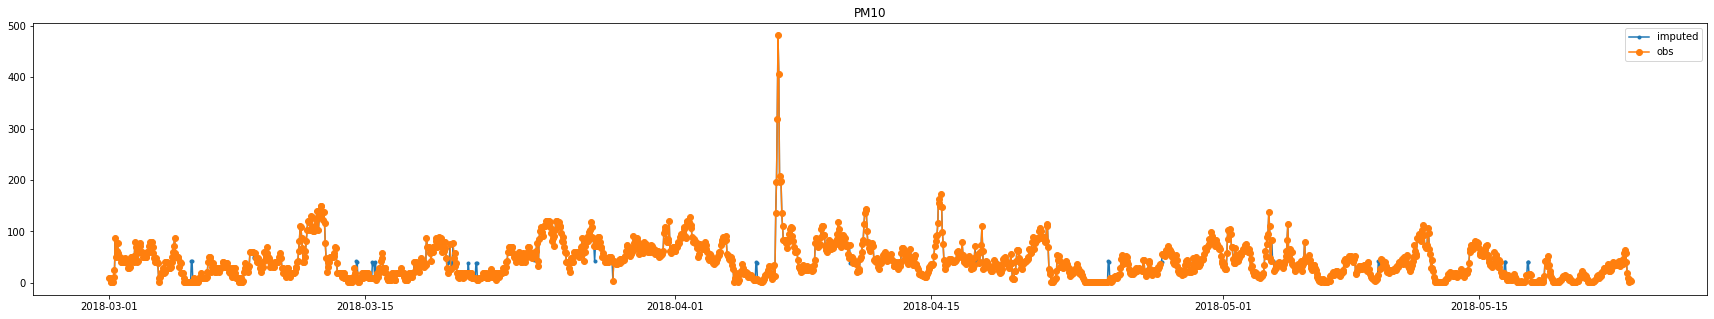

In [37]:
plt.figure(figsize=(30,5))
plt.plot(obs_imputed.loc[:2000,'Time'], obs_imputed.loc[:2000,'PM10'], '.-')
plt.plot(dangjin.loc[:2000, 'Time'], dangjin.loc[:2000, 'PM10'], '-o')
plt.legend(['imputed','obs'])
plt.title('PM10')

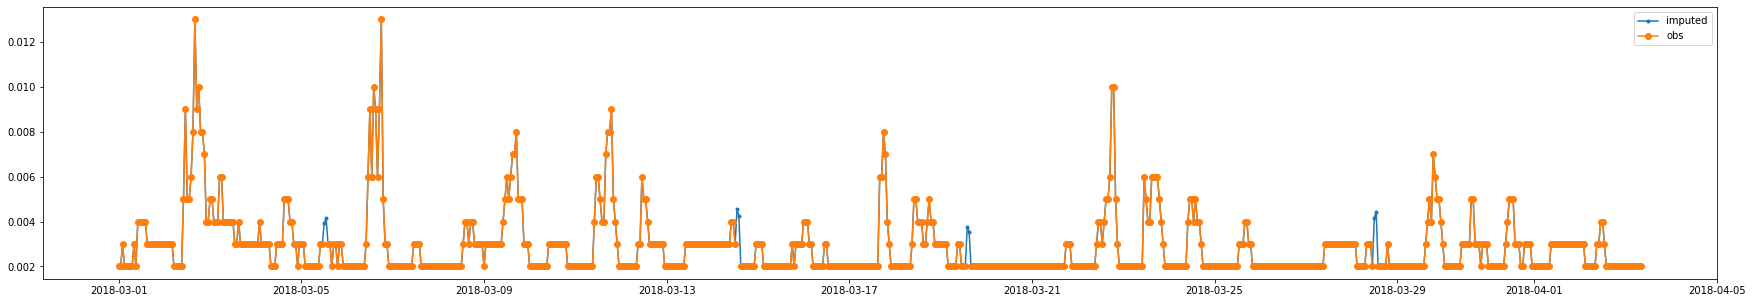

In [38]:
plt.figure(figsize=(30,5))
plt.plot(obs_imputed.loc[:800 , 'Time'], obs_imputed.loc[:800, 'so2'], '.-')
plt.plot(dangjin.loc[:800, 'Time'], dangjin.loc[:800, 'so2'], '-o')
plt.legend(['imputed','obs'])


In [39]:
obs_imputed

,so2,ozone,no2,PM2.5,PM10,Cloud,Time
0,0.002000,0.029000,0.010000,7.000000,10.000000,5.411584,2018-03-01 00:00:00
1,0.002000,0.029000,0.011000,4.000000,9.000000,5.944015,2018-03-01 01:00:00
2,0.003000,0.027000,0.013000,15.813530,1.000000,7.241237,2018-03-01 02:00:00
3,0.002000,0.025000,0.011000,17.699579,1.000000,6.812875,2018-03-01 03:00:00
4,0.002000,0.028000,0.009000,18.325597,1.000000,7.682330,2018-03-01 04:00:00
...,...,...,...,...,...,...,...
25627,0.003930,0.036822,0.012365,25.101604,41.064586,8.000000,2021-01-31 19:00:00
25628,0.003821,0.046016,0.013299,21.000000,62.000000,8.000000,2021-01-31 20:00:00
25629,0.003712,0.040611,0.013344,30.000000,59.000000,8.000000,2021-01-31 21:00:00
25630,0.004211,0.037096,0.011680,21.000000,43.000000,8.000000,2021-01-31 22:00:00


In [88]:
temp= dangjin.loc[:,['Temperature','Humidity','Rain','solar','sunTime','Cloud','WindSpeed']]#,'Cloud'
#'WindSpeed','solar','sunTime'

print(len(temp))

air = obs_imputed.iloc[:,0:5] #대기질 + 미세먼지 knn 

print(len(air))
print(temp.isna().sum())
print("="*100)
print(air.isna().sum())

df_cloud=pd.concat([temp,air],axis=1).dropna(axis=0).reset_index(drop=True) #위 관측치랑 합치기

#df_cloud=temp.dropna(axis=0).reset_index(drop=True)
#'so2','ozone','no2','PM10','PM2.5','solar','sunTime','month','co','year','hour'] 'WindDirection 
#df_cloud=temp.dropna(axis=0).reset_index(drop=True)
#df_cloud.info()

#바운더리때문에 한번

df_cloud.isnull().sum() #clf


25632
25632
Temperature       0
Humidity          0
Rain             23
solar             0
sunTime           0
Cloud          3976
WindSpeed         0
dtype: int64
so2      0
ozone    0
no2      0
PM2.5    0
PM10     0
dtype: int64


Temperature    0
Humidity       0
Rain           0
solar          0
sunTime        0
Cloud          0
WindSpeed      0
so2            0
ozone          0
no2            0
PM2.5          0
PM10           0
dtype: int64

In [89]:
df_cloud

,Temperature,Humidity,Rain,solar,sunTime,Cloud,WindSpeed,so2,ozone,no2,PM2.5,PM10
0,30.3,71.0,0.000010,2.68,0.9,4.0,1.9,0.004000,0.027000,0.009000,23.000000,39.0
1,30.4,65.0,0.000009,3.83,1.0,5.0,2.5,0.005000,0.046000,0.009000,25.000000,40.0
2,26.9,75.0,0.000000,0.00,0.0,2.0,2.4,0.004000,0.051000,0.006000,21.000000,24.0
3,26.3,80.0,0.000000,0.00,0.0,1.0,1.1,0.002000,0.045000,0.005000,16.000000,31.0
4,26.2,85.0,0.000000,0.00,0.0,0.0,1.2,0.002000,0.040000,0.004000,19.000000,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21628,-0.3,82.0,0.064975,0.00,0.0,0.0,0.8,0.003329,0.015715,0.025427,41.000000,85.0
21629,-1.6,84.0,0.051168,0.00,0.0,0.0,0.0,0.003961,0.026356,0.019436,45.000000,177.0
21630,-2.0,86.0,0.035736,0.00,0.0,0.0,0.1,0.004118,0.026718,0.020601,45.000000,140.0
21631,-2.4,88.0,0.018680,0.00,0.0,1.0,0.9,0.003591,0.025104,0.019320,31.233271,83.0


In [72]:
# 구름 na인 행 뽑아내기, 나중에 predict에 쓸 것
df=pd.concat([temp,air],axis=1)
df_nacloud = df[df['Cloud'].isna()]
#df_nacloud = df_nacloud.dropna(subset=['Temperature','WindSpeed','Humidity','Rain','solar','sunTime','forecasting_cloud','ozone','no2','pm10','pm2.5','so2','month','WindDirection']).reset_index(drop=True)
df_nacloud

,Temperature,Humidity,Rain,solar,sunTime,Cloud,WindSpeed,solar,sunTime,so2,ozone,no2,PM2.5,PM10
0,3.1,96.0,1.800000,0.00,0.0,NaN,3.6,0.00,0.0,0.002,0.029,0.010,7.000000,10.0
1,2.8,97.0,1.792298,0.00,0.0,NaN,0.7,0.00,0.0,0.002,0.029,0.011,4.000000,9.0
2,2.6,95.0,1.778744,0.00,0.0,NaN,3.2,0.00,0.0,0.003,0.027,0.013,15.813530,1.0
3,2.0,97.0,1.759338,0.00,0.0,NaN,1.9,0.00,0.0,0.002,0.025,0.011,17.699579,1.0
4,2.2,97.0,1.734080,0.00,0.0,NaN,2.1,0.00,0.0,0.002,0.028,0.009,18.325597,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23417,15.6,52.0,4.527951,0.35,0.5,NaN,1.2,0.35,0.5,0.004,0.057,0.007,7.000000,29.0
23757,7.9,89.0,0.029630,0.00,0.0,NaN,0.6,0.00,0.0,0.003,0.019,0.024,89.000000,108.0
23758,6.9,92.0,0.021167,0.00,0.0,NaN,0.0,0.00,0.0,0.003,0.008,0.030,101.000000,112.0
23924,8.6,77.0,3.354960,0.00,0.0,NaN,0.1,0.00,0.0,0.004,0.027,0.019,32.000000,34.0


# 1. 모델링 - 랜덤포레스트

앙상블 기법인 랜덤 포레스트를 사용하여 앙상블에 참여한 모든 결정 트리에서 계산한 평균적인 불순도 감소로 특성 중요도를 측정할 수 있다.

특징은 트리 기반 모델이기에 표준화나 정규화를 할 필요가 없고, 사이킷 런의 랜덤 포레스트 구현은 특성 중요도 값을 수집하고 있다는 점이다.
=> Cloud 정규화 안해도 된다


In [90]:
from sklearn.model_selection import train_test_split
 
x = df_cloud[df_cloud.columns.difference(['Cloud'])] 
y = df_cloud['Cloud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
#y_train = y_train.astype('float32')

#x_train = x_train.astype('float32').round(3)


15143
6490
15143
6490


In [91]:
x

,Humidity,PM10,PM2.5,Rain,Temperature,WindSpeed,no2,ozone,so2,solar,sunTime
0,71.0,39.0,23.000000,0.000010,30.3,1.9,0.009000,0.027000,0.004000,2.68,0.9
1,65.0,40.0,25.000000,0.000009,30.4,2.5,0.009000,0.046000,0.005000,3.83,1.0
2,75.0,24.0,21.000000,0.000000,26.9,2.4,0.006000,0.051000,0.004000,0.00,0.0
3,80.0,31.0,16.000000,0.000000,26.3,1.1,0.005000,0.045000,0.002000,0.00,0.0
4,85.0,27.0,19.000000,0.000000,26.2,1.2,0.004000,0.040000,0.002000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21628,82.0,85.0,41.000000,0.064975,-0.3,0.8,0.025427,0.015715,0.003329,0.00,0.0
21629,84.0,177.0,45.000000,0.051168,-1.6,0.0,0.019436,0.026356,0.003961,0.00,0.0
21630,86.0,140.0,45.000000,0.035736,-2.0,0.1,0.020601,0.026718,0.004118,0.00,0.0
21631,88.0,83.0,31.233271,0.018680,-2.4,0.9,0.019320,0.025104,0.003591,0.00,0.0


In [92]:
#일단 정확도 볼라고 분류기 먼저
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics    
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

forest = RandomForestClassifier(n_estimators=100, random_state=10)
#max_depth=32,  min_samples_leaf= 2, min_samples_split= 4

forest.fit(x_train, y_train)
#y_pred = forest.predict(x_test)
y_pred = forest.predict(x_test)
print(y_pred)
print(y_test)

print('정확도 :', metrics.accuracy_score(y_test, y_pred)) 
print(mean_squared_error(y_test, y_pred))

print("훈련 세트 정확도: {:.3f}".format(forest.score(x_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(x_test, y_test)))


[ 0.  0. 10. ... 10.  0.  0.]
5600      0.0
4848     10.0
16577    10.0
4228      9.0
2739      8.0
         ... 
7755      0.0
12460     6.0
11570    10.0
2039      6.0
13623     7.0
Name: Cloud, Length: 6490, dtype: float64
정확도 : 0.42033898305084744
11.718335901386748
훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.420


In [60]:
#ulsan_no_cloud=ulsan[ulsan['cloud'].isnull()]
y_test=df_nacloud['Cloud']
x_test[df_nacloud.columns.difference(['Cloud'])] 

pred=forest.predict(x_test)
len(pred)
# ulsan_no_cloud['cloud']=pred
# ulsan_no_cloud

# ulsan_final=pd.concat([ulsan_cloud,ulsan_no_cloud]).sort_index()
# ulsan_final=ulsan_final.iloc[:,:14]
# ulsan_final



6490

In [46]:
pip install mglearn

     |████████████████████████████████| 542kB 10.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=f4e22bcea701039c6d369a4f1fcabe53afc999764e08c4af8154c36b8fe89056
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [47]:
y_train.value_counts()

0.0     3509
10.0    2691
9.0     1655
8.0     1411
7.0     1348
6.0     1117
5.0      773
1.0      752
2.0      674
4.0      609
3.0      604
Name: Cloud, dtype: int64

In [48]:
# from sklearn.tree import export_graphviz

# estimator = forest.estimators_[3]
# fn = ['Humidity', 'PM10', 'PM2.5', 'Rain', 'Temperature', 'WindSpeed', 'no2',
#        'ozone', 'so2', 'solar', 'solar', 'sunTime', 'sunTime']
# cn = ['0','1','2','3','4','5','6','7','8','9','10']     
# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = fn, 
#                 class_names = cn)
#                 #max_depth = 3, # 표현하고 싶은 최대 depth
#                 #precision = 3, # 소수점 표기 자릿수
#                # filled = True, # class별 color 채우기
#                 #rounded=True, # 박스의 모양을 둥글게
# import graphviz

# with open("tree.dot") as f:
#     dot_graph = f.read()

# display(graphviz.Source(dot_graph))

# # dot 파일 이미지로 저장하기
# dot = graphviz.Source(dot_graph)
# dot.format='png'
# dot.render(filename='tree')

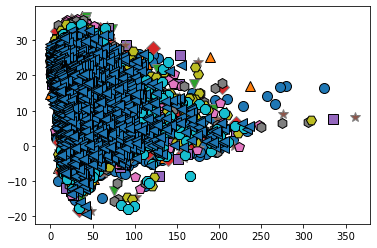

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn


# fig, axes = plt.subplots(2,3 , figsize = (20,10))
# for i , (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
#     ax.set_title("트리 {}".format(i))
#     mglearn.plots.plot_tree_partition(x,y,tree, ax=ax)
#x_train = x_train.to_numpy()
x_train
#mglearn.plots.plot_2d_separator(forest, x_train,ax=axes[-1, -1], fill=True, alpha= .4)
#axes[-1,-1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(x.iloc[:,1], x.iloc[:,4], y)


In [50]:
pip install mlxtend


In [51]:
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
import itertools
#import model_selection

#from sklearn.model_selection
#from sklearn.model_selection import

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [52]:
pip install eli5

     |████████████████████████████████| 112kB 11.5MB/s 


In [94]:
from eli5 import show_prediction
import eli5
eli5.show_weights(forest, feature_names = x.columns.tolist(), show_feature_values=True) #색깔 왜이럼?

Weight,Feature
0.1294 ± 0.0101,Temperature
0.1051 ± 0.0094,Rain
0.1031 ± 0.0082,ozone
0.1030 ± 0.0069,PM10
0.1005 ± 0.0099,Humidity
0.1003 ± 0.0080,PM2.5
0.0964 ± 0.0078,WindSpeed
0.0902 ± 0.0081,no2
0.0710 ± 0.0089,solar
0.0528 ± 0.0071,so2


In [98]:
x_train_ml = x_train[['solar','sunTime']].values
y_train_ml = y_train.values
y_train_ml=y_train_ml.astype(np.integer)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

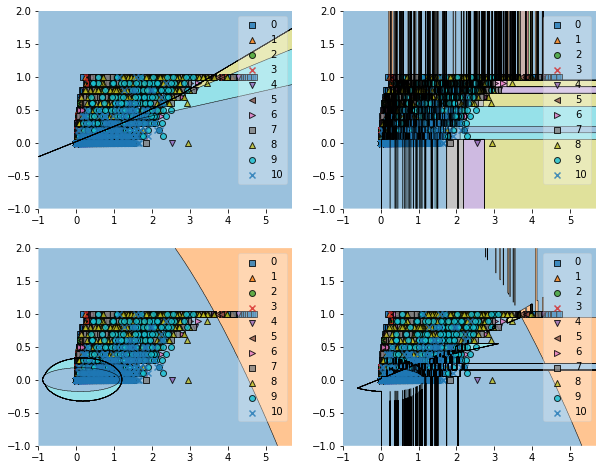

In [99]:

clf1 = LogisticRegression(random_state=1)
clf2 = forest #RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])
value=1.5
width=0.75
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10,8))
labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1], repeat=2)):
                         
    clf.fit(x_train_ml, y_train_ml)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=x_train_ml, y=y_train_ml, clf=clf)
                                #filler_feature_values={2: value, 3:value},
                                # 4:value,5:value,6:value,7:value,8:value,9:value,10:value,11:value,12:value
                               # filler_feature_ranges={2: width, 3: width})
                                # 4:width,5:width,6:width,7:width,8:width,9:width,10:width,11:width,12:width
                          
    #plt.title(lab) 아 뿔 싸 

In [ ]:
x_train_ml = x_train[[ 'Rain','Temperature']].values
#X = dataset.iloc[:, :2].values
y_train_ml = y_train.values
y_train_ml=y_train_ml.astype(np.integer)


#forest.fit(x_train_ml, y_train_ml)
fig = plot_decision_regions(X=x_train_ml, y=y_train_ml, clf=clf)
                           # feature_index=[0,2], 
                           # filler_feature_values={1: value,2: value,  3:width},
                            #filler_feature_ranges={1: width,2: width, 3:width})
                                # 4:value,5:value,6:value,7:value,8:value,9:value,10:value,11:value,12:value
                            
                                # 4:width,5:width,6:width,7:width,8:width,9:width,10:width,11:width,12:width)
plt.title('RF-decision boundary')



In [ ]:
x_train_ml = x_train[['Rain', 'Temperature']].values
y_train_ml = y_train.values#X = dataset.iloc[:, :2].values
y_train_ml=y_train_ml.astype(np.integer)

model.fit(x_train_ml, y_train_ml)
fig = plot_decision_regions(X=x_train_ml, y=y_train_ml, clf=clf)
                                #feature_index=[0,1,2], 
                                #filler_feature_values={0:value,1:value,2:value,3:value, 4:value,5:value,6:value,7:value,8:value,9:value,10:value,11:value,12:value},
                                #filler_feature_ranges={0:width,1:width,2:width,3:width,4:width,5:width,6:width,7:width,8:width,9:width,10:width,11:width,12:width})
plt.title('RF-decision boundary')

In [ ]:
# from sklearn.model_selection import GridSearchCV

# params = { 'n_estimators' : [50,100],
#            'max_depth' : [16,32,64],
#            'min_samples_leaf' : [1,2,8],
#            'min_samples_split' : [2,4]
#             }

# # RandomForestClassifier 객체 생성 후 GridSearchCV 수행
# rf_clf = RandomForestClassifier(random_state = 10, n_jobs = -1)
# grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
# grid_cv.fit(x_train, y_train)

# print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
# print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

# # 최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
# # 최고 예측 정확도: 0.3623 


In [ ]:
from sklearn.model_selection import train_test_split
 
x = df_cloud[df_cloud.columns.difference(['Cloud'])] 
y = df_cloud['Cloud']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
#y_train = y_train.astype('float32')
#x_train = x_train.astype('float32').round(3)


In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=12,random_state=2,max_features=4, min_samples_leaf= 8, min_samples_split= 8)
model.fit(x_train, y_train) #na없는걸루
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

# ##########모델 예측

x_temp = df_nacloud[df_nacloud.columns.difference(['Cloud'])] #na인것만 다시 가져올것
y_predict = model.predict(x_temp)

# print("="*100)
# pd.DataFrame(y_predict).value_counts()
print(mean_squared_error(y_test, y_pred))

#y_df = (y_predict)

y_df = pd.Series(y_predict)
#y_df.rename(columns={0:'Cloud'})

temp2 = pd.concat([temp,air],axis=1)


0.5445618752891513
0.42601719716880937
12.57457627118644


In [ ]:

temp2

In [ ]:
y_train.value_counts()

In [ ]:
# from sklearn.tree import export_graphviz
# estimator = model.estimators_[3]

# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = x_train.columns,
#                 class_names = 'Cloud',
#                 max_depth = 3, # 표현하고 싶은 최대 depth
#                 precision = 3, # 소수점 표기 자릿수
#                 filled = True, # class별 color 채우기
#                 rounded=True, # 박스의 모양을 둥글게
#                )

# # .dot 파일로 export 해줍니다
# export_graphviz(model, out_file='tree.dot')

# # 생성된 .dot 파일을 .png로 변환
# # from subprocess import call
# # call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

# # jupyter notebook에서 .png 직접 출력
# from IPython.display import Image
# Image(filename = 'decistion-tree.png')


In [ ]:
y_predict

In [ ]:
#발전량에 쓸것.
temp2['Cloud'] = temp2['Cloud'].fillna(y_df)

#temp2.to_csv('/content/drive/MyDrive/Colab Notebooks/전주시 데이터분석/data/RF_cloud.csv', index=False)


In [ ]:
temp3 = temp2['Cloud'].dropna().astype('int')

import matplotlib.cm as cm
import matplotlib.colors as col

values = temp3.value_counts()
cmap = cm.ScalarMappable(col.Normalize(0,99), cm.binary)
plt.grid()
plt.bar(np.arange(len(values)), values, color = cmap.to_rgba(values))
plt.show()



In [79]:
x_train

,Humidity,PM10,PM2.5,Rain,Temperature,WindSpeed,no2,ozone,so2,solar,solar,sunTime,sunTime
20051,88.0,48.0,25.625097,0.001153,4.2,0.2,0.029000,0.00700,0.004000,0.00,0.00,0.0,0.0
1206,93.0,9.0,23.972516,39.363770,19.5,2.1,0.010991,0.02818,0.003044,0.00,0.00,0.0,0.0
7801,97.0,35.0,24.714376,0.000000,21.1,0.3,0.010000,0.01400,0.003000,0.01,0.01,0.0,0.0
14191,73.0,60.0,22.000000,0.000268,13.3,5.0,0.006000,0.06900,0.003000,0.39,0.39,0.1,0.1
16126,51.0,54.0,22.000000,24.572648,29.4,2.6,0.007000,0.05300,0.004000,2.46,2.46,0.8,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,69.0,43.0,23.000000,0.000000,-8.2,1.0,0.024000,0.00300,0.004000,0.00,0.00,0.0,0.0
1603,55.0,34.0,14.000000,0.000000,19.1,3.3,0.007000,0.03300,0.004000,1.84,1.84,1.0,1.0
11806,45.0,22.0,12.000000,0.000000,4.6,3.0,0.008000,0.02700,0.004000,0.00,0.00,0.0,0.0
2253,33.0,58.0,47.000000,0.024738,18.2,1.2,0.022000,0.04000,0.017000,2.38,2.38,1.0,1.0


특성 중요도 : 
[0.10045011 0.10299552 0.1002792  0.10509207 0.12943793 0.09642393
 0.09020062 0.10313381 0.05275159 0.07098892 0.04824629]


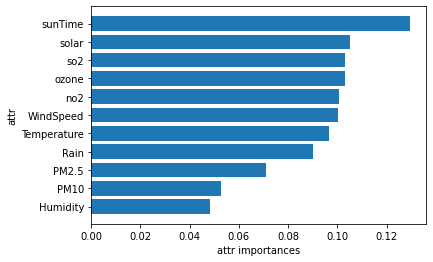

In [93]:
print("특성 중요도 : \n{}".format(forest.feature_importances_))
feature_names = x_train.columns.tolist()

def plot_feature_importances(model):

    n_features = x_train.shape[1]
    plt.barh(range(n_features), sorted(model.feature_importances_)) #어?

    plt.yticks(np.arange(n_features),feature_names)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

plt.show()
plot_feature_importances(forest)

In [70]:
x_train

,Humidity,PM10,PM2.5,Rain,Temperature,WindSpeed,no2,ozone,so2,solar,solar,sunTime,sunTime
8763,49.0,35.0,25.0,0.000000,31.1,1.9,0.007,0.030,0.005,1.63,1.63,1.0,1.0
6910,61.0,90.0,61.0,5.965239,19.8,0.1,0.022,0.039,0.007,0.00,0.00,0.0,0.0
10065,54.0,49.0,36.0,0.750694,22.6,1.5,0.009,0.080,0.006,0.39,0.39,1.0,1.0
3804,72.0,66.0,44.0,0.004586,1.5,0.8,0.034,0.008,0.005,1.23,1.23,1.0,1.0
5316,95.0,43.0,34.0,0.051323,4.7,0.3,0.013,0.040,0.005,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,97.0,4.0,4.0,90.572173,17.2,2.6,0.022,0.014,0.002,0.08,0.08,0.0,0.0
4062,92.0,54.0,34.0,0.000000,-6.1,0.1,0.027,0.003,0.003,0.00,0.00,0.0,0.0
5272,28.0,59.0,49.0,0.108693,6.7,1.3,0.028,0.011,0.005,0.00,0.00,0.0,0.0
19092,86.0,72.0,37.0,0.292227,10.3,0.4,0.043,0.004,0.003,0.00,0.00,0.0,0.0


# 모델링2 - 선형회귀

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression(normalize= True)
mlr.fit(x_train, y_train) 

In [ ]:
#정확도 확인
y_predict = mlr.predict(x_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Cloud")
plt.ylabel("Predicted Cloud")


In [ ]:
#결정계수 R²가 클수록 실제값과 예측값이 유사함을 의미하며, 데이터를 잘 설명 0.7이상이면 양호
print(mlr.score(x_train, y_train))  #0.4



In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Humidity=df_cloud['Humidity']

plot_acf(Humidity)
plot_pacf(Humidity)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Humidity, order=(1,0,1))
model_fit = model.fit(trend='c',full_output=True, disp=1)
print(model_fit.summary())
